### Importing Libraries
The following libraries are imported to support the development of the language prediction model:

In [360]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
import re
import pickle

### Loading and Exploring the Dataset
To load the language dataset into a Pandas DataFrame and examine the first 10 rows of the dataset:

In [361]:
data = pd.read_csv('dataset.csv')

In [362]:
data.head(10)

,text,language
0,AZ SAM UCHITEL,bulgarian
1,IVAN E LEKAR,bulgarian
2,TOVA E KASHTA,bulgarian
3,ONOVA E MAGAZIN,bulgarian
4,AZ SAM STROG UCHITEL,bulgarian
5,IVAN E DOBAR LEKAR,bulgarian
6,YULIA E MOYAT UCHITEL,bulgarian
7,TOVA E NASHATA KASHTA,bulgarian
8,YULIA E MOYAT NOV UCHITEL,bulgarian
9,IVAN E NASH DOBAR PRIYATEL,bulgarian


### Language Distribution
To show the distribution of languages in the dataset:

In [363]:
data["language"].value_counts()

language
bulgarian     81
english       81
french        81
irish         81
german        81
greek         81
spanish       81
swedish       81
italian       81
portuguese    81
Name: count, dtype: int64

To prepare the data for training the language prediction model:

In [364]:
X = data["text"]
y = data["language"]

Encoding the language labels as numeric values:

In [365]:
le = LabelEncoder()
y = le.fit_transform(y)

### Text Preprocessing 
Preprocessing the text data before training the Language Prediction Model:

In [366]:
data_list = []
for text in X:
        text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', text)
        text = re.sub(r'[[]]', ' ', text)
        text = text.lower()
        data_list.append(text)

### Bag of Words
* This is done to represent text data numerically
* This creates a matrix of word counts, where
    * each row represents a text sample
    * each column represents a unique word from the dataset

In [367]:
cv = CountVectorizer()
X = cv.fit_transform(data_list).toarray()

In [368]:
X.shape

(810, 1358)

### Splitting the Dataset
The dataset is split into training and testing sets.<br>
The dataset is divided into **80% for training** and **20% for testing**

In [369]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

### Model Training and Prediction

In [370]:
model = MultinomialNB() # Model Initialization
model.fit(x_train, y_train) # Model Training
y_pred = model.predict(x_test) # Prediction

### Model Evaluation

- Accuracy: {ac * 100}%

In [371]:
ac = accuracy_score(y_test, y_pred)
print("Accuracy is :{}% ".format(ac * 100))

Accuracy is :98.14814814814815% 


- Classification Report: 

In [372]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.95      1.00      0.98        21
           2       1.00      1.00      1.00        15
           3       1.00      1.00      1.00        18
           4       1.00      1.00      1.00        19
           5       1.00      0.93      0.97        15
           6       1.00      1.00      1.00        14
           7       1.00      0.91      0.95        22
           8       0.86      1.00      0.92        12
           9       1.00      1.00      1.00        11

    accuracy                           0.98       162
   macro avg       0.98      0.98      0.98       162
weighted avg       0.98      0.98      0.98       162



- Confusion Matrix: 

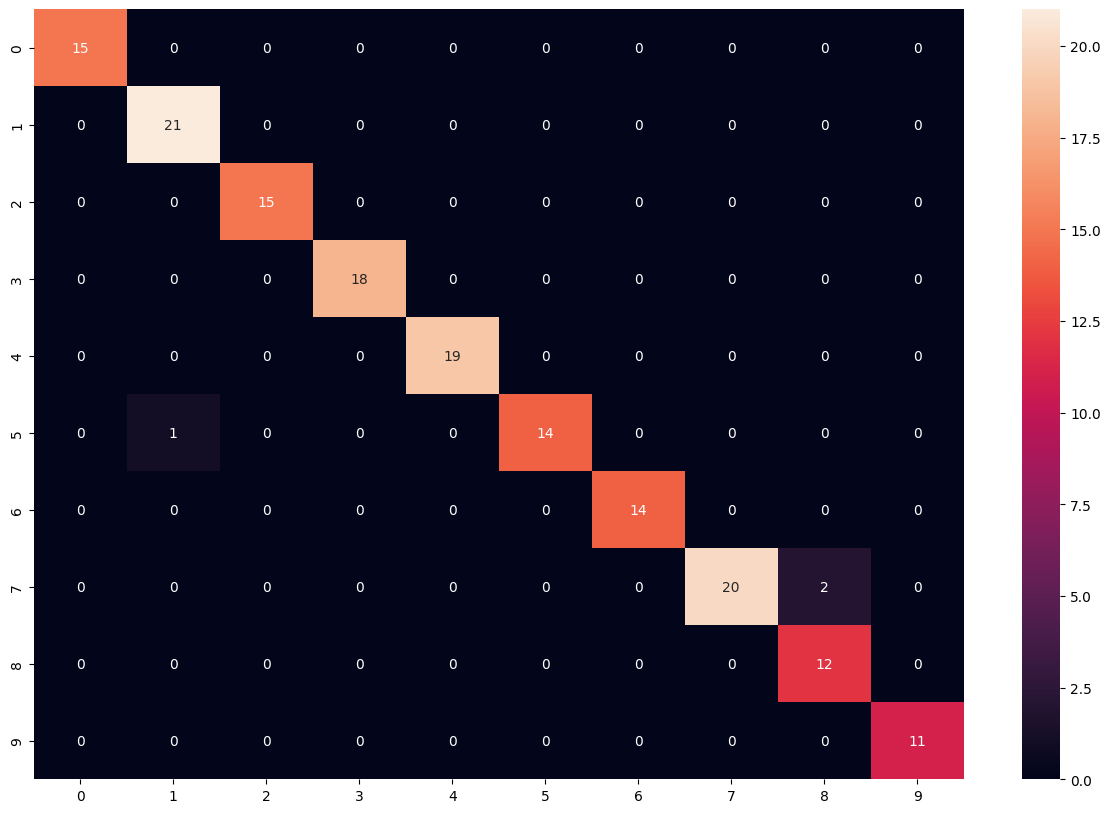

In [373]:
cm = confusion_matrix(y_test, y_pred)

# to visualize the Confusion Matrix:
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot = True)
plt.show()

### Model Saving
- These saved files can be loaded later to reuse the trained models without retraining them from scratch

In [374]:
pickle.dump(cv, open("./model_files/transform.pkl", "wb"))
pickle.dump(model, open("./model_files/model.pkl", "wb"))